In [2]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
df = pd.read_excel('data_bersih.xlsx')
df

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,PERSENTASE,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,26,89.7,Online,Online,Nurdin,Riska,Fahmi
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,31,81.6,Online,Online,Yuyun,Icca,Ani Maliani
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,24,92.3,Bandung,PPSDMA,Juni,Agus J,Aries
3,Effective Interpersonal Skills In Business Com...,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,24,80.0,Jakarta,BPSDM,Tris,Dessy,Ani Maliani
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,14,53.8,Bandung,PPSDMA,Rohyat,Riska,Makmun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Manajemen Proyek TIK Angkatan 1,2023-06-20,2023-06-27,41,Swakelola,Diklat Teknis,T,Online,24,18,75.0,Online,Online,Aang,Deni,Pujoko
129,Analisis Kebijakan Publik Angkatan 3,2023-06-26,2023-07-05,46,Swakelola,Diklat Teknis,L,Online,26,21,80.8,Online,Online,Nurdin,Fahmi,Aris
130,Business Strategy Management Angkatan 1,2023-06-26,2023-07-04,38,Swakelola,Diklat Teknis,S,Online,25,20,80.0,Online,Online,Ega,Riska,Makmun
131,Etos Kerja Angkatan 2,2023-06-26,2023-07-04,41,Swakelola,Diklat Teknis,S,Online,23,21,91.3,Online,Online,Tris,Endrawan,Hendris


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NAMA_PELATIHAN                 133 non-null    object        
 1   TGL_MULAI                      133 non-null    datetime64[ns]
 2   TGL_SELESAI                    133 non-null    datetime64[ns]
 3   JP                             133 non-null    int64         
 4   TEKNIS_PENYELENGGARAAN         133 non-null    object        
 5   JENIS_PENGEMBANGAN_KOMPETENSI  133 non-null    object        
 6   JENIS_DIKLAT                   133 non-null    object        
 7   METODE_PELATIHAN               133 non-null    object        
 8   TARGET                         133 non-null    int64         
 9   REALISASI                      133 non-null    int64         
 10  PERSENTASE                     133 non-null    float64       
 11  KOTA_PELAKSANAAN   

In [5]:
# Cek Duplikat
df.duplicated().sum()

0

# **Data Preprocessing**

**mengubah tipe data**

In [6]:
# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
df['MONTH'] = df['TGL_MULAI'].dt.month
df['DAY'] = df['TGL_MULAI'].dt.day

In [7]:
df.head()

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,PERSENTASE,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,26,89.7,Online,Online,Nurdin,Riska,Fahmi,1,16
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,31,81.6,Online,Online,Yuyun,Icca,Ani Maliani,1,16
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,24,92.3,Bandung,PPSDMA,Juni,Agus J,Aries,1,16
3,Effective Interpersonal Skills In Business Com...,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,24,80.0,Jakarta,BPSDM,Tris,Dessy,Ani Maliani,1,24
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,14,53.8,Bandung,PPSDMA,Rohyat,Riska,Makmun,1,24


**Drop Unused Features**

In [8]:
df.drop(columns=['NAMA_PELATIHAN', 'PERSENTASE', 'TGL_MULAI', 'TGL_SELESAI', 'TEKNIS_PENYELENGGARAAN', 'JENIS_PENGEMBANGAN_KOMPETENSI', 'PIC_PENYELENGGARA', 'Supporting', 'PIC_AKADEMIS'], inplace=True)

**Checking Outliers**

In [9]:
df.head()

,JP,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,MONTH,DAY
0,47,S,Online,29,26,Online,Online,1,16
1,36,S,Online,38,31,Online,Online,1,16
2,38,S,Blended,26,24,Bandung,PPSDMA,1,16
3,31,S,Offline,30,24,Jakarta,BPSDM,1,24
4,41,S,Offline,26,14,Bandung,PPSDMA,1,24


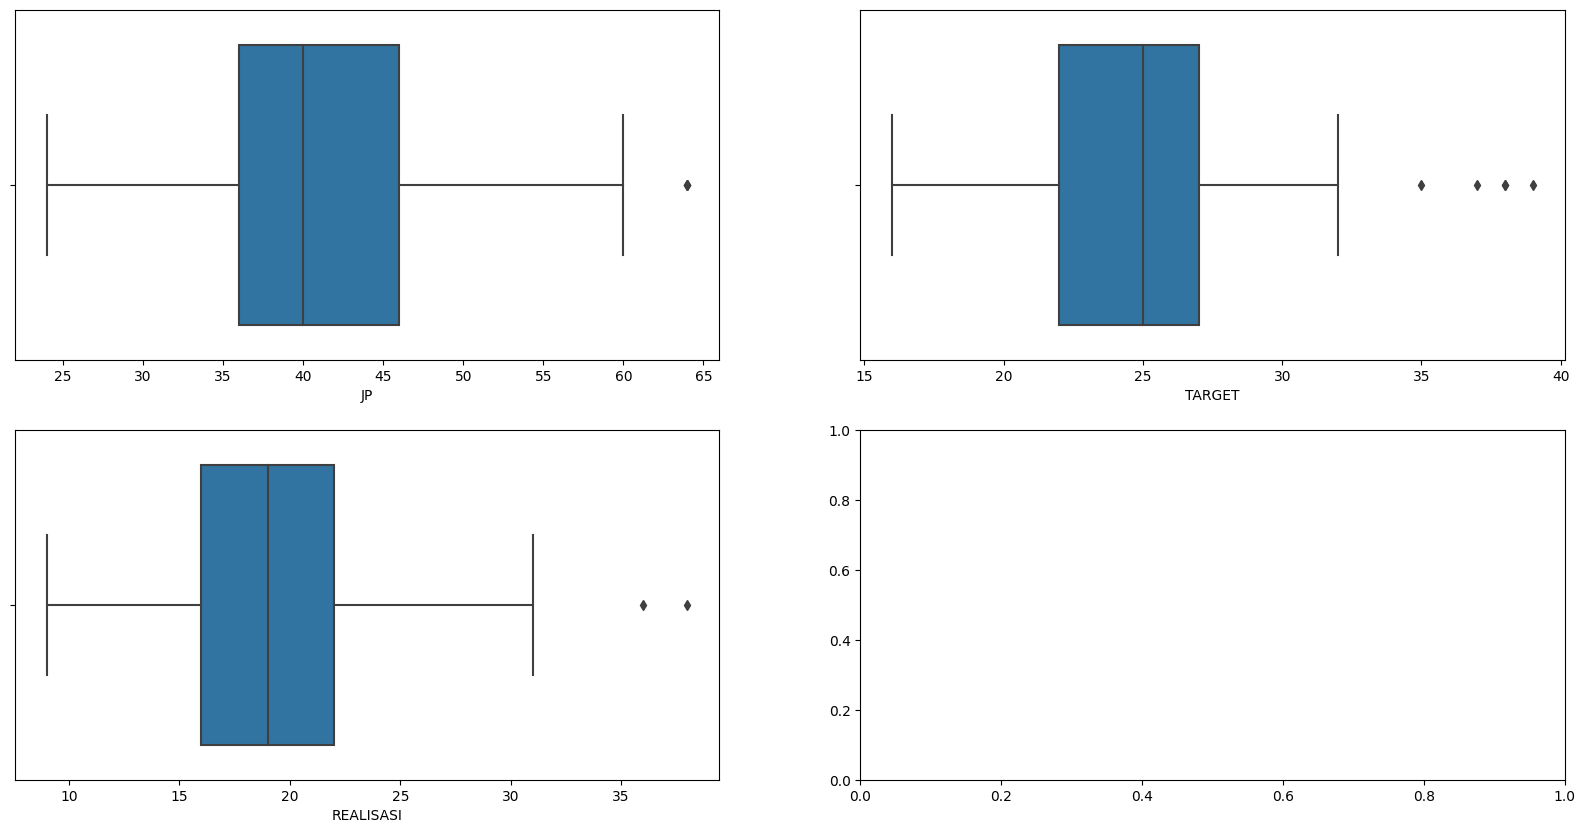

In [10]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(data=df, x='JP', ax=axes[0][0])
sns.boxplot(data=df, x='TARGET', ax=axes[0][1])
sns.boxplot(data=df, x='REALISASI', ax=axes[1][0])
plt.show()

# **Modeling**

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

## **Encoding**

In [12]:
categorical_features = df.describe(include='object').columns
categorical_features

Index(['JENIS_DIKLAT', 'METODE_PELATIHAN', 'KOTA_PELAKSANAAN',
       'TEMPAT_PELAKSANAAN'],
      dtype='object')

In [13]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,JENIS_DIKLAT,4,"[C, L, S, T]"
1,METODE_PELATIHAN,3,"[Blended, Offline, Online]"
2,KOTA_PELAKSANAAN,4,"[Bandung, Jakarta, Online, Sukabumi]"
3,TEMPAT_PELAKSANAAN,7,"[BPSDM, Cisolok, Ditjen EBTKE, LEMIGAS, Online, PPSDM KEBTKE, PPSDMA]"


In [14]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = "ignore"), ['JENIS_DIKLAT', 'METODE_PELATIHAN', 'KOTA_PELAKSANAAN', 'TEMPAT_PELAKSANAAN'])
], remainder='passthrough')

## **Define Features (X) and Target(y)**

In [15]:
X = df.drop(columns=['REALISASI'])
y = df['REALISASI']

## **Data Splitting**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_ada, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=19)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-3.56968525 -3.07408108 -2.93774288 -3.83665185 -4.19090039] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2.88508788 -2.59962363 -2.20183837 -3.05653337 -3.59776562] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.18405302 -0.13251705 -0.11590172 -0.14502167 -0.22460606] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zer

[-4.49092362 -3.7984517  -3.19138867 -4.23605898 -3.80855105] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-3.67633867 -3.00709914 -2.27481638 -3.42822499 -3.06422035] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.23750241 -0.15335658 -0.11972693 -0.16873313 -0.2113069 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-4.83829421 -5.464169   -3.43649877 -3.95209408 -5.4902511 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=0))
[-4.22727273 -4.04761905 -2.66666667 -3.33333333 -4.33333333] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(

c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.29279007 -0.22645663 -0.13414151 -0.16278613 -0.30508174] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-3.77040815 -3.65925385 -2.8594684  -3.2184722  -3.76185419] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-3.31281524 -2.82520831 -2.20561547 -2.59663253 -2.92424691] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.21865716 -0.13253337 -0.11926366 -0.1205685  -0.20650853] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-3.74276973 -3.8312651  -3.18269021 -3.58887705 -3.9409541 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=AdaBoostRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-3.14159438 -2.83738396 -2.41076547 -2.73710564 -3.04887382] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=AdaBoostRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.20688427 -0.13247882 -0.13047657 -0.12575862 -0.21510628] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=AdaBoostRegressor(random_state=0))


c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-4.38518638 -3.92467604 -3.68169197 -2.84853157 -4.23977098] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                                  importance_

c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-3.7979722  -3.17145475 -2.95433335 -2.0924807  -3.23776254] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                                  importance_

c:\Users\marsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
# Membuat dataframe dari hasil semua kandidat
df_crossval = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values('Mean_MAPE', ascending=False)

df_crossval

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
3,RandomForest Regressor,-3.453891,0.359432,-2.772904,0.366069,-0.159506,0.043752
0,Linear Regression,-3.521812,0.467054,-2.868170,0.465659,-0.160420,0.039181
4,AdaBoost Regressor,-3.657311,0.263805,-2.835145,0.256634,-0.162141,0.040034
5,XGBoost Regressor,-3.815971,0.542107,-3.050801,0.554159,-0.171012,0.048492
1,KNN Regressor,-3.905075,0.443351,-3.090140,0.475447,-0.178125,0.041806
2,DecisionTree Regressor,-4.636261,0.820129,-3.721645,0.632431,-0.224251,0.068020


## **Predict to test set**

In [20]:
# Benchmark 3 model terbaik
models = {
    'XGB': log_xgb,
    'RandomForest': log_rf,
    'DecisionTree' : log_dt
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,5.612715,4.520778,0.238641
RandomForest,4.988990,3.901440,0.208861
DecisionTree,5.385165,4.259259,0.231061


## **Hyperparameter Tuning**

In [21]:
n_estimators = list(np.arange(100,1000,50))
criterion = ['squared_error', 'absolute_error']
max_depth = list(np.arange(2,50,1))
min_sample_split = list(np.arange(2,50,1))
min_sample_leaf = list(np.arange(2,50,1))
max_features = list(np.arange(3,7,1))


# Hyperparam space XGboost
hyperparam_space_rf = {
    'model__regressor__criterion': criterion,
    'model__regressor__max_depth': max_depth,
    'model__regressor__min_samples_split': min_sample_split,
    'model__regressor__n_estimators': n_estimators,
    'model__regressor__min_samples_leaf': min_sample_leaf,
    'model__regressor__max_features': max_features
}

In [22]:
# Benchmark model dengan hyperparameter tuning
rf = log_rf

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 1000,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)

In [23]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['JENIS_DIKLAT',
                                                                                'METODE_PELATIHAN',
                                                                                'KOTA_PELAKSANAAN',
                                                                                'TEMPAT_PELAKSANAAN'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              Tran...
                                        'model__regressor__min_samples_split': [2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                13,
                                                                                14,
                                                                                15,
                                                                                16,
                                                                                17,
                                                                                18,
                                                                                19,
                                                                                20,
                                                                                21,
                                                                                22,
                                                                                23,
                                                                                24,
                                                                                25,
                                                                                26,
                                                                                27,
                                                                                28,
                                                                                29,
                                                                                30,
                                                                                31, ...],
                                        'model__regressor__n_estimators': [100,
                                                                           150,
                                                                           200,
                                    

In [24]:
random_rf.best_params_


{'model__regressor__n_estimators': 100,
 'model__regressor__min_samples_split': 8,
 'model__regressor__min_samples_leaf': 2,
 'model__regressor__max_features': 6,
 'model__regressor__max_depth': 41,
 'model__regressor__criterion': 'absolute_error'}

In [25]:
random_rf.best_score_

-3.705758537860011

In [26]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE

df_hasil = pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

In [27]:
pd.set_option('display.max_columns',None)
df_hasil.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__n_estimators,param_model__regressor__min_samples_split,param_model__regressor__min_samples_leaf,param_model__regressor__max_features,param_model__regressor__max_depth,param_model__regressor__criterion,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
626,0.301524,0.007979,0.018040,0.001569,100,8,2,6,41,absolute_error,"{'model__regressor__n_estimators': 100, 'model__regressor__min_samples_split': 8, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 6, 'model__regressor__max_depth': 41, 'model__regressor__criterion': 'absolute_error'}",-3.751920,-3.758039,-3.970128,-3.231955,-3.816751,-3.705759,0.249626,1,-2.972158,-2.776734,-3.127992,-2.608210,-3.068555,-2.910730,0.192540,1,-0.156737,-0.131895,-0.155420,-0.173112,-0.213716,-0.166176,0.027159,1
981,1.302948,0.079472,0.060869,0.006201,500,4,3,5,10,squared_error,"{'model__regressor__n_estimators': 500, 'model__regressor__min_samples_split': 4, 'model__regressor__min_samples_leaf': 3, 'model__regressor__max_features': 5, 'model__regressor__max_depth': 10, 'model__regressor__criterion': 'squared_error'}",-3.653482,-3.703600,-3.895384,-3.436790,-4.005450,-3.738941,0.197661,2,-2.869229,-2.703861,-3.125401,-2.798174,-3.108435,-2.921020,0.168421,2,-0.150929,-0.127276,-0.152438,-0.187465,-0.214283,-0.166478,0.030664,2
225,1.386129,0.029830,0.054499,0.001649,500,10,2,5,35,absolute_error,"{'model__regressor__n_estimators': 500, 'model__regressor__min_samples_split': 10, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 5, 'model__regressor__max_depth': 35, 'model__regressor__criterion': 'absolute_error'}",-3.670775,-3.749115,-3.988011,-3.353412,-4.050246,-3.762312,0.248837,3,-2.917608,-2.764838,-3.187374,-2.718782,-3.216751,-2.961070,0.207695,3,-0.154861,-0.130966,-0.155228,-0.183238,-0.222773,-0.169413,0.031399,3
232,1.276339,0.021176,0.051358,0.003674,450,3,3,5,42,absolute_error,"{'model__regressor__n_estimators': 450, 'model__regressor__min_samples_split': 3, 'model__regressor__min_samples_leaf': 3, 'model__regressor__max_features': 5, 'model__regressor__max_depth': 42, 'model__regressor__criterion': 'absolute_error'}",-3.660551,-3.731895,-4.028887,-3.379322,-4.028825,-3.765896,0.244944,4,-2.907027,-2.795646,-3.215295,-2.752337,-3.170098,-2.968081,0.190753,4,-0.154591,-0.132919,-0.156254,-0.185103,-0.218841,-0.169542,0.029711,4
28,0.692771,0.012931,0.036103,0.001076,300,4,5,6,39,squared_error,"{'model__regressor__n_estimators': 300, 'model__regressor__min_samples_split': 4, 'model__regressor__min_samples_leaf': 5, 'model__regressor__max_features': 6, 'model__regressor__max_depth': 39, 'model__regressor__criterion': 'squared_error'}",-3.735298,-3.856933,-3.864613,-3.373646,-4.043840,-3.774866,0.223464,5,-2.962730,-2.889269,-3.132398,-2.755124,-3.163338,-2.980572,0.152273,5,-0.155880,-0.135882,-0.153109,-0.186622,-0.217286,-0.169756,0.028847,5


In [28]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest
Best_score: -3.705758537860011
Best_params: {'model__regressor__n_estimators': 100, 'model__regressor__min_samples_split': 8, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 6, 'model__regressor__max_depth': 41, 'model__regressor__criterion': 'absolute_error'}


## **Predict to test set (with the tuned model)**

In [29]:
# Model rfoost
model = {'RandomForest' : log_rf}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,5.02797,3.854971,0.205461


### **Performance Comparison**

In [30]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,4.98899,3.90144,0.208861


In [31]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,5.02797,3.854971,0.205461


## **Hyperparameter Tuning 2**

In [32]:
n_estimators_2 = list(np.arange(100,500,50))
criterion_2 = ['squared_error', 'absolute_error']
max_depth_2 = list(np.arange(10,43,1))
min_sample_split_2 = list(np.arange(3,11,1))
min_sample_leaf_2 = list(np.arange(2,6,1))
max_features_2 = list(np.arange(5,7,1))


# Hyperparam space XGboost
hyperparam_space_rf_2 = {
    'model__regressor__criterion': criterion_2,
    'model__regressor__max_depth': max_depth_2,
    'model__regressor__min_samples_split': min_sample_split_2,
    'model__regressor__n_estimators': n_estimators_2,
    'model__regressor__min_samples_leaf': min_sample_leaf_2,
    'model__regressor__max_features': max_features_2
}

In [33]:
# Benchmark model dengan hyperparameter tuning
rf_2 = log_rf

# Membuat algorithm chains
estimator_rf_2 = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf_2)
        ])

crossval_2 = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_rf_2 = RandomizedSearchCV(
    estimator_rf_2, 
    param_distributions = hyperparam_space_rf_2,
    n_iter = 500,
    cv = crossval_2, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)

In [34]:
# Fitting data training untuk mencari parameter terbaik
random_rf_2.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['JENIS_DIKLAT',
                                                                                'METODE_PELATIHAN',
                                                                                'KOTA_PELAKSANAAN',
                                                                                'TEMPAT_PELAKSANAAN'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              Tran...
                                        'model__regressor__max_features': [5,
                                                                           6],
                                        'model__regressor__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5],
                                        'model__regressor__min_samples_split': [3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10],
                                        'model__regressor__n_estimators': [100,
                                                                           150,
                                                                           200,
                                                                           250,
                                                                           300,
                                                                           350,
                                                                           400,
                                                                           450]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [35]:
random_rf_2.best_params_


{'model__regressor__n_estimators': 100,
 'model__regressor__min_samples_split': 3,
 'model__regressor__min_samples_leaf': 2,
 'model__regressor__max_features': 6,
 'model__regressor__max_depth': 17,
 'model__regressor__criterion': 'squared_error'}

In [36]:
random_rf_2.best_score_

-3.6238494749510948

In [37]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE

df_hasil = pd.DataFrame(random_rf_2.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

In [38]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf_2.best_score_)
print('Best_params:', random_rf_2.best_params_)

RandomForest
Best_score: -3.6238494749510948
Best_params: {'model__regressor__n_estimators': 100, 'model__regressor__min_samples_split': 3, 'model__regressor__min_samples_leaf': 2, 'model__regressor__max_features': 6, 'model__regressor__max_depth': 17, 'model__regressor__criterion': 'squared_error'}


## **Predict to test set (with the tuned model)2**

In [39]:
# Model rf_2oost
model_2 = {'RandomForest' : log_rf}

# Define model terhadap estimator terbaik
rf_2_tuning = random_rf_2.best_estimator_

# Fitting model
rf_2_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_2_tuning = rf_2_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_2_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_2_tuning))
mae_rf_2_tuning = mean_absolute_error(y_test, y_pred_rf_2_tuning)
mape_rf_2_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_2_tuning)

score_after_tuning_2 = pd.DataFrame({'RMSE': rmse_rf_2_tuning, 'MAE': mae_rf_2_tuning, 'MAPE': mape_rf_2_tuning}, index=model.keys())
score_after_tuning_2

,RMSE,MAE,MAPE
RandomForest,4.92468,3.760366,0.197473


### **Performance Comparison 2**

Perbandingan performa model RandomForest sebelum dan sesudah dilakukan hyperparameter tuning.

In [40]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,4.98899,3.90144,0.208861


In [41]:
# Setelah hyperparameter tuning
score_after_tuning_2

,RMSE,MAE,MAPE
RandomForest,4.92468,3.760366,0.197473


### **Analisis Nilai Prediksi, Nilai Aktual, dan Error**

**Visualisasi Y Prediksi VS Y Aktual**

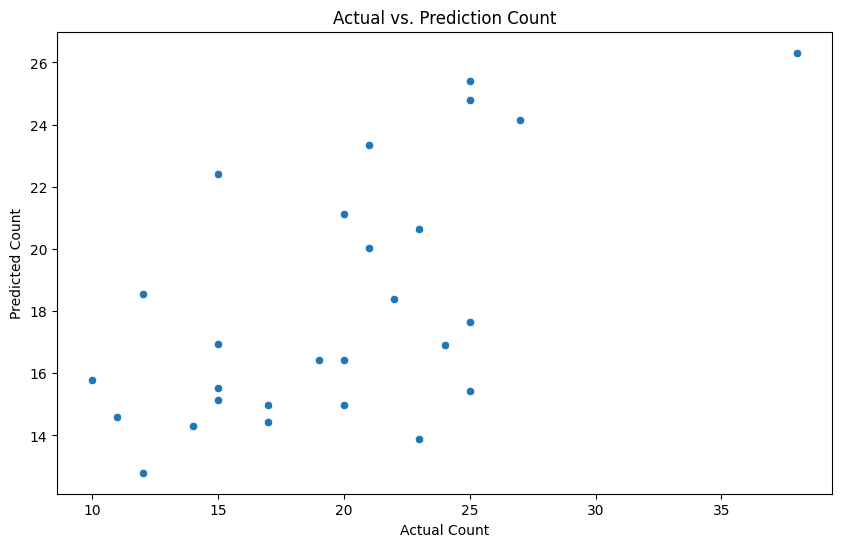

In [42]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_2_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

In [43]:
# Plot feature importances
feature_imp = pd.DataFrame(rf_2_tuning['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).reset_index().rename(columns={'index' : 'Feature', 0 : 'Importance'})
top_feature = feature_imp.sort_values('Importance',ascending=False)
top_feature

,Feature,Importance
15,remainder__TARGET,0.424368
14,remainder__JP,0.124013
17,remainder__DAY,0.104654
16,remainder__MONTH,0.084866
4,One Hot__METODE_PELATIHAN_Online,0.053539
6,One Hot__KOTA_PELAKSANAAN_Online,0.045439
13,One Hot__TEMPAT_PELAKSANAAN_PPSDMA,0.031925
11,One Hot__TEMPAT_PELAKSANAAN_Online,0.031000
1,One Hot__JENIS_DIKLAT_S,0.024263
2,One Hot__JENIS_DIKLAT_T,0.022588


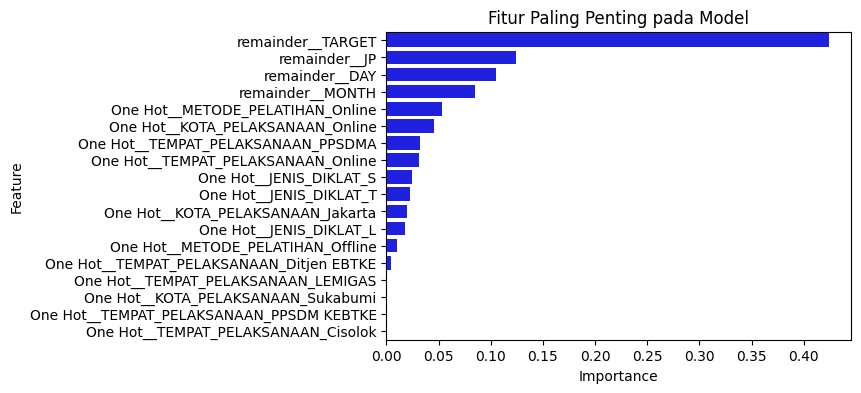

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(data=top_feature,x='Importance', y='Feature', color='b')
plt.title('Fitur Paling Penting pada Model')
plt.show()

## **Save Model**

In [45]:
import pickle

In [46]:
random_rf_2.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['JENIS_DIKLAT',
                                                   'METODE_PELATIHAN',
                                                   'KOTA_PELAKSANAAN',
                                                   'TEMPAT_PELAKSANAAN'])])),
                ('scaler', RobustScaler()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(max_depth=17,
                                                                            max_features=6,
                                                                            min_samples_leaf=2,
                                                                            min_samples_split=3,
                                                                            random_state=0)))])

In [47]:
# saving model

# best model
final_model = random_rf_2.best_estimator_

# fitting to all data
final_model.fit(X, y)

# save
pickle.dump(final_model, open('model_randomforest_for_realisasi_regression.sav', 'wb'))

In [48]:
# Load model
filename = 'model_randomforest_for_realisasi_regression.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [49]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

3.1306242656849346

In [76]:
new = pd.read_excel("Khusus Swakelola v2.xlsx")
new

,NO,NAMA PELATIHAN,TGL MULAI,TGL SELESAI,JP,TEKNIS PENYELENGGARAAN,JENIS PENGEMBANGAN KOMPETENSI,JENIS DIKLAT,METODE PELATIHAN,TARGET,REALISASI,KOTA PELAKSANAAN,TEMPAT PELAKSANAAN,PIC PENYELENGGARA,Supporting,PIC AKADEMIS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2,1.0,Excellent Service Angkatan 1,2023-01-16 00:00:00,2023-01-20 00:00:00,47,Swakelola,Diklat Teknis,S,Online,29,26,-,-,Nurdin,Riska,Fahmi
3,2.0,Managing People Angkatan 1,2023-01-16 00:00:00,2023-01-20 00:00:00,36,Swakelola,Diklat Teknis,S,Online,38,31,-,-,Yuyun,Icca,Ani Maliani
4,3.0,Manajemen Pelayanan Publik Angkatan 1,2023-01-16 00:00:00,2023-01-20 00:00:00,38,Swakelola,Diklat Teknis,S,Blended,26,24,Bandung,PPSDMA,Juni,Agus J,Aries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,NaN,NaN,S.D AKHIR TAHUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,REKAP,KEGIATAN,TARGET,REALISASI,SELISIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,PELATIHAN OFFLINE,119,2943,2000,943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,PELATIHAN ONLINE,157,4292,1107,3185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
new = new.rename(columns={'NAMA PELATIHAN': 'NAMA_PELATIHAN', 'TGL MULAI': 'TGL_MULAI', 'TGL SELESAI': 'TGL_SELESAI', 'TEKNIS PENYELENGGARAAN': 'TEKNIS_PENYELENGGARAAN', 'JENIS PENGEMBANGAN KOMPETENSI': 'JENIS_PENGEMBANGAN_KOMPETENSI', 'JENIS DIKLAT': 'JENIS_DIKLAT', 'METODE PELATIHAN': 'METODE_PELATIHAN', 'KOTA PELAKSANAAN': 'KOTA_PELAKSANAAN', 'TEMPAT PELAKSANAAN': 'TEMPAT_PELAKSANAAN', 'PIC PENYELENGGARA': 'PIC_PENYELENGGARA', 'PIC AKADEMIS': 'PIC_AKADEMIS'})

In [78]:
new = new.drop(columns=('NO'))
new = new.drop(index=(0))
new = new.drop(index=(1)).reset_index(drop=True)

In [79]:
new.drop(new.index[0:133], inplace=True)
new = new.reset_index(drop=True)
new

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS
0,Analisis Manajemen ASN Angkatan 1,2023-07-03 00:00:00,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,21,0,0,Andri S,Putri,Irfan
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03 00:00:00,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,19,0,0,Bambang,Icca,Pujoko
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03 00:00:00,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,17,Bandung,PPSDMA,Heri,Riska,Patar
3,Manajemen Perkantoran Angkatan 7,2023-07-03 00:00:00,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,17,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana
4,Pelatihan IKPA Angkatan 2,2023-07-03 00:00:00,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,21,Jakarta,BPSDM,Aang,Rini,Fahmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,S.D AKHIR TAHUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,REKAP,KEGIATAN,TARGET,REALISASI,SELISIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,PELATIHAN OFFLINE,119,2943,2000,943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,PELATIHAN ONLINE,157,4292,1107,3185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
new.drop(new.index[143:], inplace=True)
new = new.reset_index(drop=True)
new

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS
0,Analisis Manajemen ASN Angkatan 1,2023-07-03 00:00:00,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,21,0,0,Andri S,Putri,Irfan
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03 00:00:00,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,19,0,0,Bambang,Icca,Pujoko
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03 00:00:00,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,17,Bandung,PPSDMA,Heri,Riska,Patar
3,Manajemen Perkantoran Angkatan 7,2023-07-03 00:00:00,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,17,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana
4,Pelatihan IKPA Angkatan 2,2023-07-03 00:00:00,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,21,Jakarta,BPSDM,Aang,Rini,Fahmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,11 Des 2023,14 Des 2023,34,Swakelola,Diklat Teknis,S,Online,35,NaN,0,0,Heri,Fikri,Erick Hutrindo
139,Aplikasi Perkantoran Angkatan 6,11 Des 2023,15 Des 2023,44,Swakelola,Diklat Teknis,S,Online,25,NaN,0,0,Juni,Endrawan,Ani
140,Communication Skill Angkatan 6,11 Des 2023,15 Des 2023,40,Swakelola,Diklat Teknis,S,Online,32,NaN,0,0,Tris,Rini,Dian
141,Effective Interpersonal Skills In Business Communication Angkatan 9,11 Des 2023,15 Des 2023,35,Swakelola,Diklat Teknis,S,Online,27,NaN,0,0,Suparto,Putri,Ganjar


In [81]:
# Mengubah object menjadi integer
new['JP'] = new['JP'].astype(int)

In [82]:
# Mengubah object menjadi integer
new['TARGET'] = new['TARGET'].astype(int)

In [83]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   NAMA_PELATIHAN                 143 non-null    object
 1   TGL_MULAI                      143 non-null    object
 2   TGL_SELESAI                    143 non-null    object
 3   JP                             143 non-null    int32 
 4   TEKNIS_PENYELENGGARAAN         143 non-null    object
 5   JENIS_PENGEMBANGAN_KOMPETENSI  143 non-null    object
 6   JENIS_DIKLAT                   143 non-null    object
 7   METODE_PELATIHAN               143 non-null    object
 8   TARGET                         143 non-null    int32 
 9   REALISASI                      33 non-null     object
 10  KOTA_PELAKSANAAN               143 non-null    object
 11  TEMPAT_PELAKSANAAN             143 non-null    object
 12  PIC_PENYELENGGARA              143 non-null    object
 13  Suppo

In [84]:
# Mengubah format tanggal
new['TGL_MULAI'] = new['TGL_MULAI'].replace('9 Okt 2023' , '2023-10-09 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('2 Okt 2023' , '2023-10-02 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('30 Okt 2023' , '2023-10-30 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('16 Okt 2023' , '2023-10-16 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('23 Okt 2023' , '2023-10-23 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('21 Agu 2023' , '2023-08-21 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('14 Agu 2023' , '2023-08-14 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('7 Agu 2023' , '2023-08-07 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('28 Agu 2023' , '2023-08-28 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('1 Agu 2023' , '2023-08-01 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('23 Agu 2023' , '2023-08-23 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('8 Agu 2023' , '2023-08-08 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('9 Agu 2023' , '2023-08-09 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('24 Agu 2023' , '2023-08-24 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('22 Agu 2023' , '2023-08-22 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('4 Des 2023' , '2023-12-04 00:00:00')
new['TGL_MULAI'] = new['TGL_MULAI'].replace('11 Des 2023' , '2023-12-11 00:00:00')

In [85]:
new['TGL_MULAI'].value_counts()

TGL_MULAI
2023-09-18 00:00:00    9
2023-10-09 00:00:00    8
2023-09-11 00:00:00    7
2023-07-10 00:00:00    7
2023-07-24 00:00:00    7
2023-11-06 00:00:00    7
2023-10-02 00:00:00    7
2023-08-21 00:00:00    7
2023-12-04 00:00:00    6
2023-11-27 00:00:00    6
2023-11-20 00:00:00    6
2023-07-03 00:00:00    6
2023-07-17 00:00:00    6
2023-12-11 00:00:00    5
2023-10-30 00:00:00    5
2023-09-25 00:00:00    5
2023-11-13 00:00:00    5
2023-09-04 00:00:00    4
2023-08-14 00:00:00    4
2023-07-31 00:00:00    4
2023-08-07 00:00:00    4
2023-08-28 00:00:00    3
2023-08-01 00:00:00    2
2023-08-23 00:00:00    2
2023-10-16 00:00:00    2
2023-08-08 00:00:00    2
2023-08-09 00:00:00    2
2023-08-24 00:00:00    1
2023-11-21 00:00:00    1
2023-11-28 00:00:00    1
2023-08-22 00:00:00    1
2023-10-23 00:00:00    1
Name: count, dtype: int64

In [86]:
new['TGL_MULAI'] = pd.to_datetime(new['TGL_MULAI'], dayfirst = True)

In [87]:
# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
new['MONTH'] = new['TGL_MULAI'].dt.month
new['DAY'] = new['TGL_MULAI'].dt.day

In [88]:
new

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,21,0,0,Andri S,Putri,Irfan,7,3
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,19,0,0,Bambang,Icca,Pujoko,7,3
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,17,Bandung,PPSDMA,Heri,Riska,Patar,7,3
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,17,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,14 Des 2023,34,Swakelola,Diklat Teknis,S,Online,35,NaN,0,0,Heri,Fikri,Erick Hutrindo,12,11
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,15 Des 2023,44,Swakelola,Diklat Teknis,S,Online,25,NaN,0,0,Juni,Endrawan,Ani,12,11
140,Communication Skill Angkatan 6,2023-12-11,15 Des 2023,40,Swakelola,Diklat Teknis,S,Online,32,NaN,0,0,Tris,Rini,Dian,12,11
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,15 Des 2023,35,Swakelola,Diklat Teknis,S,Online,27,NaN,0,0,Suparto,Putri,Ganjar,12,11


In [89]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NAMA_PELATIHAN                 143 non-null    object        
 1   TGL_MULAI                      143 non-null    datetime64[ns]
 2   TGL_SELESAI                    143 non-null    object        
 3   JP                             143 non-null    int32         
 4   TEKNIS_PENYELENGGARAAN         143 non-null    object        
 5   JENIS_PENGEMBANGAN_KOMPETENSI  143 non-null    object        
 6   JENIS_DIKLAT                   143 non-null    object        
 7   METODE_PELATIHAN               143 non-null    object        
 8   TARGET                         143 non-null    int32         
 9   REALISASI                      33 non-null     object        
 10  KOTA_PELAKSANAAN               143 non-null    object        
 11  TEMPAT_PELAKSANAAN 

In [90]:
new['KOTA_PELAKSANAAN'].value_counts()

KOTA_PELAKSANAAN
0          119
Bandung     16
Jakarta      5
Cisolok      3
Name: count, dtype: int64

In [91]:
new['KOTA_PELAKSANAAN'] = new['KOTA_PELAKSANAAN'].replace(0 , 'Online')

In [92]:
new['KOTA_PELAKSANAAN'] = new['KOTA_PELAKSANAAN'].replace('Cisolok' , 'Sukabumi')

In [93]:
new['KOTA_PELAKSANAAN'].value_counts()

KOTA_PELAKSANAAN
Online      119
Bandung      16
Jakarta       5
Sukabumi      3
Name: count, dtype: int64

In [94]:
new['TEMPAT_PELAKSANAAN'].value_counts()

TEMPAT_PELAKSANAAN
0         122
PPSDMA     16
BPSDM       5
Name: count, dtype: int64

In [95]:
new.loc[new['KOTA_PELAKSANAAN'] == 'Sukabumi', 'TEMPAT_PELAKSANAAN'] = 'Cisolok'

In [96]:
new['TEMPAT_PELAKSANAAN'] = new['TEMPAT_PELAKSANAAN'].replace(0 , 'Online')

In [97]:
new['TEMPAT_PELAKSANAAN'].value_counts()

TEMPAT_PELAKSANAAN
Online     119
PPSDMA      16
BPSDM        5
Cisolok      3
Name: count, dtype: int64

In [98]:
new['TEMPAT_PELAKSANAAN'].value_counts()

TEMPAT_PELAKSANAAN
Online     119
PPSDMA      16
BPSDM        5
Cisolok      3
Name: count, dtype: int64

In [99]:
new

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,21,Online,Online,Andri S,Putri,Irfan,7,3
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,19,Online,Online,Bambang,Icca,Pujoko,7,3
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,17,Bandung,PPSDMA,Heri,Riska,Patar,7,3
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,17,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,14 Des 2023,34,Swakelola,Diklat Teknis,S,Online,35,NaN,Online,Online,Heri,Fikri,Erick Hutrindo,12,11
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,15 Des 2023,44,Swakelola,Diklat Teknis,S,Online,25,NaN,Online,Online,Juni,Endrawan,Ani,12,11
140,Communication Skill Angkatan 6,2023-12-11,15 Des 2023,40,Swakelola,Diklat Teknis,S,Online,32,NaN,Online,Online,Tris,Rini,Dian,12,11
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,15 Des 2023,35,Swakelola,Diklat Teknis,S,Online,27,NaN,Online,Online,Suparto,Putri,Ganjar,12,11


In [100]:
# Mengubah format tanggal
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('13 Okt 2023' , '2023-10-13 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('6 Okt 2023' , '2023-10-06 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('2 Okt 2023' , '2023-10-02 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('20 Okt 2023' , '2023-10-20 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('5 Okt 2023' , '2023-10-05 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('27 Okt 2023' , '2023-10-27 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('4 Agu 2023' , '2023-08-04 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('25 Agu 2023' , '2023-08-25 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('21 Agu 2023' , '2023-08-21 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('11 Agu 2023' , '2023-08-11 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('15 Agu 2023' , '2023-08-15 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('14 Agu 2023' , '2023-08-14 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('29 Agu 2023' , '2023-08-29 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('30 Agu 2023' , '2023-08-30 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('28 Agu 2023' , '2023-08-28 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('10 Agu 2023' , '2023-08-10 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('1 Des 2023' , '2023-12-01 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('15 Des 2023' , '2023-12-15 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('8 Des 2023' , '2023-12-08 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('14 Des 2023' , '2023-12-14 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('7 Des 2023' , '2023-12-07 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('6 Des 2023' , '2023-12-06 00:00:00')
new['TGL_SELESAI'] = new['TGL_SELESAI'].replace('4 Des 2023' , '2023-12-04 00:00:00')

In [101]:
new['TGL_SELESAI'].value_counts()

TGL_SELESAI
2023-09-22 00:00:00    9
2023-10-13 00:00:00    8
2023-09-15 00:00:00    7
2023-08-25 00:00:00    7
2023-07-14 00:00:00    7
2023-07-07 00:00:00    6
2023-07-24 00:00:00    6
2023-12-01 00:00:00    6
2023-08-04 00:00:00    6
2023-11-10 00:00:00    6
2023-10-06 00:00:00    6
2023-11-24 00:00:00    5
2023-11-17 00:00:00    5
2023-11-03 00:00:00    5
2023-10-02 00:00:00    5
2023-07-28 00:00:00    5
2023-12-15 00:00:00    4
2023-08-21 00:00:00    4
2023-12-08 00:00:00    4
2023-08-11 00:00:00    3
2023-09-01 00:00:00    3
2023-09-08 00:00:00    3
2023-07-27 00:00:00    2
2023-08-15 00:00:00    2
2023-10-20 00:00:00    2
2023-08-14 00:00:00    2
2023-08-29 00:00:00    2
2023-10-05 00:00:00    1
2023-12-14 00:00:00    1
2023-12-07 00:00:00    1
2023-12-06 00:00:00    1
2023-12-04 00:00:00    1
2023-11-23 00:00:00    1
2023-11-27 00:00:00    1
2023-08-30 00:00:00    1
2023-08-28 00:00:00    1
2023-08-10 00:00:00    1
2023-09-07 00:00:00    1
2023-10-27 00:00:00    1
2023-11-09 00

In [102]:
new = new.drop(columns=['REALISASI'])


In [103]:
new['KOTA_PELAKSANAAN'].value_counts()

KOTA_PELAKSANAAN
Online      119
Bandung      16
Jakarta       5
Sukabumi      3
Name: count, dtype: int64

In [104]:
new['TEMPAT_PELAKSANAAN'].value_counts()

TEMPAT_PELAKSANAAN
Online     119
PPSDMA      16
BPSDM        5
Cisolok      3
Name: count, dtype: int64

In [105]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NAMA_PELATIHAN                 143 non-null    object        
 1   TGL_MULAI                      143 non-null    datetime64[ns]
 2   TGL_SELESAI                    143 non-null    object        
 3   JP                             143 non-null    int32         
 4   TEKNIS_PENYELENGGARAAN         143 non-null    object        
 5   JENIS_PENGEMBANGAN_KOMPETENSI  143 non-null    object        
 6   JENIS_DIKLAT                   143 non-null    object        
 7   METODE_PELATIHAN               143 non-null    object        
 8   TARGET                         143 non-null    int32         
 9   KOTA_PELAKSANAAN               143 non-null    object        
 10  TEMPAT_PELAKSANAAN             143 non-null    object        
 11  PIC_PENYELENGGARA  

In [106]:
predicted = pd.DataFrame(loaded_model.predict(new))
predicted

,0
0,17.468797
1,17.420175
2,15.317185
3,15.731682
4,13.678582
...,...
138,24.473627
139,21.215811
140,23.428805
141,22.266712


In [107]:
predicted.rename(columns={0 : 'REALISASI'}, inplace=True)

In [108]:
predicted

,REALISASI
0,17.468797
1,17.420175
2,15.317185
3,15.731682
4,13.678582
...,...
138,24.473627
139,21.215811
140,23.428805
141,22.266712


In [109]:
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   REALISASI  143 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [110]:
predicted['REALISASI'] = predicted['REALISASI'].astype(int)

In [111]:
predicted

,REALISASI
0,17
1,17
2,15
3,15
4,13
...,...
138,24
139,21
140,23
141,22


In [112]:
predicted.iloc[0:32].sum()

REALISASI    569
dtype: int64

In [113]:
predicted

,REALISASI
0,17
1,17
2,15
3,15
4,13
...,...
138,24
139,21
140,23
141,22


In [114]:
new

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11
140,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11


In [115]:
result = new.join(predicted)
result

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3,17
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3,17
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3,15
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3,15
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11,24
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11,21
140,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11,23
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11,22


In [116]:
result[result['METODE_PELATIHAN']=='Online'][['REALISASI']]

,REALISASI
0,17
1,17
8,18
9,21
10,23
...,...
138,24
139,21
140,23
141,22


In [117]:
result['PREDIKSI_BIAYA'] = np.where(result['METODE_PELATIHAN'] == 'Online', result['REALISASI'] * 642015,
                       np.where(result['METODE_PELATIHAN'].isin(['Offline', 'Blended']), result['REALISASI'] * 5616825, result['REALISASI']))

In [118]:
def hitung_realisasi(x): 
    if x == 'Online': 
        return x * 642015 
    elif x == 'Offline' or x == 'Blended': 
        return x * 5616825 
    else: return None

In [119]:
result

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3,17,10914255
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3,17,10914255
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3,15,84252375
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3,15,84252375
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3,13,73018725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11,24,15408360
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11,21,13482315
140,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11,23,14766345
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11,22,14124330


In [120]:
# result['PREDIKSI_BIAYA'] = result[result['METODE_PELATIHAN']=='Online']['REALISASI'] * 642015
# result['PREDIKSI_BIAYA'] = result[(result['METODE_PELATIHAN']=='Offline')|(result['METODE_PELATIHAN']=='Blended')]['REALISASI'] * 5616825


In [121]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NAMA_PELATIHAN                 143 non-null    object        
 1   TGL_MULAI                      143 non-null    datetime64[ns]
 2   TGL_SELESAI                    143 non-null    object        
 3   JP                             143 non-null    int32         
 4   TEKNIS_PENYELENGGARAAN         143 non-null    object        
 5   JENIS_PENGEMBANGAN_KOMPETENSI  143 non-null    object        
 6   JENIS_DIKLAT                   143 non-null    object        
 7   METODE_PELATIHAN               143 non-null    object        
 8   TARGET                         143 non-null    int32         
 9   KOTA_PELAKSANAAN               143 non-null    object        
 10  TEMPAT_PELAKSANAAN             143 non-null    object        
 11  PIC_PENYELENGGARA  

In [122]:
result

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3,17,10914255
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3,17,10914255
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3,15,84252375
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3,15,84252375
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3,13,73018725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11,24,15408360
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11,21,13482315
140,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11,23,14766345
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11,22,14124330


In [123]:
result['PREDIKSI_BIAYA']

0      10914255
1      10914255
2      84252375
3      84252375
4      73018725
         ...   
138    15408360
139    13482315
140    14766345
141    14124330
142    15408360
Name: PREDIKSI_BIAYA, Length: 143, dtype: int32

In [124]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NAMA_PELATIHAN                 143 non-null    object        
 1   TGL_MULAI                      143 non-null    datetime64[ns]
 2   TGL_SELESAI                    143 non-null    object        
 3   JP                             143 non-null    int32         
 4   TEKNIS_PENYELENGGARAAN         143 non-null    object        
 5   JENIS_PENGEMBANGAN_KOMPETENSI  143 non-null    object        
 6   JENIS_DIKLAT                   143 non-null    object        
 7   METODE_PELATIHAN               143 non-null    object        
 8   TARGET                         143 non-null    int32         
 9   KOTA_PELAKSANAAN               143 non-null    object        
 10  TEMPAT_PELAKSANAAN             143 non-null    object        
 11  PIC_PENYELENGGARA  

In [125]:
result[(result['MONTH']==9)&(result['DAY']==11)]

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
62,Analisis Kebijakan Publik Angkatan 6,2023-09-11,2023-09-15 00:00:00,46,Swakelola,Diklat Teknis,L,Online,25,Online,Online,Nurdin,Agus J,Aris,9,11,21,13482315
63,Dasar Manajemen Resiko Angkatan 6,2023-09-11,2023-09-15 00:00:00,40,Swakelola,Diklat Teknis,C,Online,30,Online,Online,Ega,Riska,Erick Hutrindo,9,11,23,14766345
64,Effective Interpersonal Skills In Business Communication Angkatan 6,2023-09-11,2023-09-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Heri,Icca,Irfan,9,11,22,14124330
65,English for Presentation Skill Angkatan 6,2023-09-11,2023-09-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,26,Online,Online,Tris,Putri,Tim Tim,9,11,20,12840300
66,Karya Tulis Ilmiah Skala Internasional Angkatan 1,2023-09-11,2023-09-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,26,Online,Online,Juni,Agus J,Rohmatulloh,9,11,21,13482315
67,Pelatihan Public Speaking Angkatan 8,2023-09-11,2023-09-15 00:00:00,45,Swakelola,Diklat Teknis,S,Online,23,Online,Online,Yuyun,Endrawan,Dian,9,11,19,12198285
68,Tools Analisa Kebijakan Angkatan 1,2023-09-11,2023-09-15 00:00:00,40,Swakelola,Diklat Teknis,T,Online,38,Online,Online,Tris,Rini,Aris,9,11,25,16050375


In [126]:
result_today = result.iloc[:69]
result_today

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3,17,10914255
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3,17,10914255
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3,15,84252375
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3,15,84252375
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3,13,73018725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Effective Interpersonal Skills In Business Communication Angkatan 6,2023-09-11,2023-09-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Heri,Icca,Irfan,9,11,22,14124330
65,English for Presentation Skill Angkatan 6,2023-09-11,2023-09-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,26,Online,Online,Tris,Putri,Tim Tim,9,11,20,12840300
66,Karya Tulis Ilmiah Skala Internasional Angkatan 1,2023-09-11,2023-09-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,26,Online,Online,Juni,Agus J,Rohmatulloh,9,11,21,13482315
67,Pelatihan Public Speaking Angkatan 8,2023-09-11,2023-09-15 00:00:00,45,Swakelola,Diklat Teknis,S,Online,23,Online,Online,Yuyun,Endrawan,Dian,9,11,19,12198285


In [127]:
result[result['KOTA_PELAKSANAAN']=='Sukabumi']

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
6,Capacity Building Angkatan 4,2023-07-10,2023-07-14 00:00:00,64,Swakelola,Diklat Teknis,S,Offline,20,Sukabumi,Cisolok,Heri,Deni,Agus Mulyana,7,10,14,78635550
91,Capacity Building Angkatan 5,2023-10-09,2023-10-13 00:00:00,64,Swakelola,Diklat Teknis,S,Offline,23,Sukabumi,Cisolok,Aang,Fikri,Agus Mulyana,10,9,16,89869200
126,Capacity Building Angkatan 6,2023-11-27,2023-12-01 00:00:00,64,Swakelola,Diklat Teknis,S,Offline,30,Sukabumi,Cisolok,Aang,Fikri,Tim Tim,11,27,19,106719675


In [128]:
result[result['KOTA_PELAKSANAAN']=='Cisolok']

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA


In [129]:
result_today['KOTA_PELAKSANAAN'].value_counts()

KOTA_PELAKSANAAN
Online      47
Bandung     16
Jakarta      5
Sukabumi     1
Name: count, dtype: int64

In [130]:
result['TARGET'].sum()

3900

In [131]:
result['REALISASI'].sum()

2935

In [132]:
result['JENIS_DIKLAT'].value_counts()

JENIS_DIKLAT
S    95
T    20
C    15
L    13
Name: count, dtype: int64

In [133]:
result['METODE_PELATIHAN'].value_counts()

METODE_PELATIHAN
Online     119
Offline     18
Blended      6
Name: count, dtype: int64

In [134]:
result['KOTA_PELAKSANAAN'].value_counts()

KOTA_PELAKSANAAN
Online      119
Bandung      16
Jakarta       5
Sukabumi      3
Name: count, dtype: int64

In [135]:
result['TEMPAT_PELAKSANAAN'].value_counts()

TEMPAT_PELAKSANAAN
Online     119
PPSDMA      16
BPSDM        5
Cisolok      3
Name: count, dtype: int64

In [137]:
result.to_excel('data_prediksi_lengkap_final.xlsx', index=False)

In [ ]:
result_today.to_excel('data_prediksi_per_september11.xlsx', index=False)

In [ ]:
result.iloc[0:32]['REALISASI'].sum()

569

In [139]:
result

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3,17,10914255
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3,17,10914255
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3,15,84252375
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3,15,84252375
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3,13,73018725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11,24,15408360
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11,21,13482315
140,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11,23,14766345
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11,22,14124330


In [142]:
result1.columns

Index(['NAMA_PELATIHAN', 'TGL_MULAI', 'TGL_SELESAI', 'JP',
       'TEKNIS_PENYELENGGARAAN', 'JENIS_PENGEMBANGAN_KOMPETENSI',
       'JENIS_DIKLAT', 'METODE_PELATIHAN', 'TARGET', 'REALISASI', 'PERSENTASE',
       'KOTA_PELAKSANAAN', 'TEMPAT_PELAKSANAAN', 'PIC_PENYELENGGARA',
       'Supporting', 'PIC_AKADEMIS'],
      dtype='object')

In [140]:
result1 = pd.read_excel('data_bersih.xlsx')
result1

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,PERSENTASE,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,26,89.7,Online,Online,Nurdin,Riska,Fahmi
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,31,81.6,Online,Online,Yuyun,Icca,Ani Maliani
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,24,92.3,Bandung,PPSDMA,Juni,Agus J,Aries
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,24,80.0,Jakarta,BPSDM,Tris,Dessy,Ani Maliani
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,14,53.8,Bandung,PPSDMA,Rohyat,Riska,Makmun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Manajemen Proyek TIK Angkatan 1,2023-06-20,2023-06-27,41,Swakelola,Diklat Teknis,T,Online,24,18,75.0,Online,Online,Aang,Deni,Pujoko
129,Analisis Kebijakan Publik Angkatan 3,2023-06-26,2023-07-05,46,Swakelola,Diklat Teknis,L,Online,26,21,80.8,Online,Online,Nurdin,Fahmi,Aris
130,Business Strategy Management Angkatan 1,2023-06-26,2023-07-04,38,Swakelola,Diklat Teknis,S,Online,25,20,80.0,Online,Online,Ega,Riska,Makmun
131,Etos Kerja Angkatan 2,2023-06-26,2023-07-04,41,Swakelola,Diklat Teknis,S,Online,23,21,91.3,Online,Online,Tris,Endrawan,Hendris


In [143]:
result1.drop(columns='PERSENTASE', inplace=True)

In [144]:
result1

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,REALISASI,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,26,Online,Online,Nurdin,Riska,Fahmi
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,31,Online,Online,Yuyun,Icca,Ani Maliani
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,24,Bandung,PPSDMA,Juni,Agus J,Aries
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,24,Jakarta,BPSDM,Tris,Dessy,Ani Maliani
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,14,Bandung,PPSDMA,Rohyat,Riska,Makmun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Manajemen Proyek TIK Angkatan 1,2023-06-20,2023-06-27,41,Swakelola,Diklat Teknis,T,Online,24,18,Online,Online,Aang,Deni,Pujoko
129,Analisis Kebijakan Publik Angkatan 3,2023-06-26,2023-07-05,46,Swakelola,Diklat Teknis,L,Online,26,21,Online,Online,Nurdin,Fahmi,Aris
130,Business Strategy Management Angkatan 1,2023-06-26,2023-07-04,38,Swakelola,Diklat Teknis,S,Online,25,20,Online,Online,Ega,Riska,Makmun
131,Etos Kerja Angkatan 2,2023-06-26,2023-07-04,41,Swakelola,Diklat Teknis,S,Online,23,21,Online,Online,Tris,Endrawan,Hendris


In [145]:
result1 = result1[['NAMA_PELATIHAN', 'TGL_MULAI', 'TGL_SELESAI', 'JP',
       'TEKNIS_PENYELENGGARAAN', 'JENIS_PENGEMBANGAN_KOMPETENSI',
       'JENIS_DIKLAT', 'METODE_PELATIHAN', 'TARGET', 'KOTA_PELAKSANAAN', 'TEMPAT_PELAKSANAAN', 'PIC_PENYELENGGARA',
       'Supporting', 'PIC_AKADEMIS', 'REALISASI']]

In [147]:
result1.head()

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,REALISASI
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,Online,Online,Nurdin,Riska,Fahmi,26
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,Online,Online,Yuyun,Icca,Ani Maliani,31
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,Bandung,PPSDMA,Juni,Agus J,Aries,24
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,Jakarta,BPSDM,Tris,Dessy,Ani Maliani,24
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,Bandung,PPSDMA,Rohyat,Riska,Makmun,14


In [149]:
# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
result1['MONTH'] = result1['TGL_MULAI'].dt.month
result1['DAY'] = result1['TGL_MULAI'].dt.day

C:\Users\marsa\AppData\Local\Temp\ipykernel_3752\3629354339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['MONTH'] = result1['TGL_MULAI'].dt.month
C:\Users\marsa\AppData\Local\Temp\ipykernel_3752\3629354339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['DAY'] = result1['TGL_MULAI'].dt.day


In [150]:
result1.head()

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,REALISASI,MONTH,DAY
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,Online,Online,Nurdin,Riska,Fahmi,26,1,16
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,Online,Online,Yuyun,Icca,Ani Maliani,31,1,16
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,Bandung,PPSDMA,Juni,Agus J,Aries,24,1,16
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,Jakarta,BPSDM,Tris,Dessy,Ani Maliani,24,1,24
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,Bandung,PPSDMA,Rohyat,Riska,Makmun,14,1,24


In [151]:
result1 = result1[['NAMA_PELATIHAN', 'TGL_MULAI', 'TGL_SELESAI', 'JP',
       'TEKNIS_PENYELENGGARAAN', 'JENIS_PENGEMBANGAN_KOMPETENSI',
       'JENIS_DIKLAT', 'METODE_PELATIHAN', 'TARGET', 'KOTA_PELAKSANAAN', 'TEMPAT_PELAKSANAAN', 'PIC_PENYELENGGARA',
       'Supporting', 'PIC_AKADEMIS', 'MONTH', 'DAY', 'REALISASI']]

In [152]:
result1.head()

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,Online,Online,Nurdin,Riska,Fahmi,1,16,26
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,Online,Online,Yuyun,Icca,Ani Maliani,1,16,31
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,Bandung,PPSDMA,Juni,Agus J,Aries,1,16,24
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,Jakarta,BPSDM,Tris,Dessy,Ani Maliani,1,24,24
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,Bandung,PPSDMA,Rohyat,Riska,Makmun,1,24,14


In [157]:
result

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Analisis Manajemen ASN Angkatan 1,2023-07-03,2023-07-07 00:00:00,44,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Andri S,Putri,Irfan,7,3,17,10914255
1,Analisis Manajemen Organisasi Angkatan 1,2023-07-03,2023-07-07 00:00:00,42,Swakelola,Diklat Teknis,T,Online,23,Online,Online,Bambang,Icca,Pujoko,7,3,17,10914255
2,Manajemen Pelayanan Publik Angkatan 7,2023-07-03,2023-07-07 00:00:00,40,Swakelola,Diklat Teknis,S,Offline,24,Bandung,PPSDMA,Heri,Riska,Patar,7,3,15,84252375
3,Manajemen Perkantoran Angkatan 7,2023-07-03,2023-07-07 00:00:00,48,Swakelola,Diklat Teknis,S,Offline,22,Bandung,PPSDMA,Yuyun,Agus J,Agus Mulyana,7,3,15,84252375
4,Pelatihan IKPA Angkatan 2,2023-07-03,2023-07-07 00:00:00,33,Swakelola,Diklat Teknis,T,Blended,21,Jakarta,BPSDM,Aang,Rini,Fahmi,7,3,13,73018725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11,24,15408360
139,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11,21,13482315
140,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11,23,14766345
141,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11,22,14124330


In [153]:
result1['PREDIKSI_BIAYA'] = np.where(result1['METODE_PELATIHAN'] == 'Online', result1['REALISASI'] * 642015,
                       np.where(result1['METODE_PELATIHAN'].isin(['Offline', 'Blended']), result1['REALISASI'] * 5616825, result1['REALISASI']))

C:\Users\marsa\AppData\Local\Temp\ipykernel_3752\3054425762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['PREDIKSI_BIAYA'] = np.where(result1['METODE_PELATIHAN'] == 'Online', result1['REALISASI'] * 642015,


In [156]:
result1

,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20,47,Swakelola,Diklat Teknis,S,Online,29,Online,Online,Nurdin,Riska,Fahmi,1,16,26,16692390
1,Managing People Angkatan 1,2023-01-16,2023-01-20,36,Swakelola,Diklat Teknis,S,Online,38,Online,Online,Yuyun,Icca,Ani Maliani,1,16,31,19902465
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20,38,Swakelola,Diklat Teknis,S,Blended,26,Bandung,PPSDMA,Juni,Agus J,Aries,1,16,24,134803800
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27,31,Swakelola,Diklat Teknis,S,Offline,30,Jakarta,BPSDM,Tris,Dessy,Ani Maliani,1,24,24,134803800
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27,41,Swakelola,Diklat Teknis,S,Offline,26,Bandung,PPSDMA,Rohyat,Riska,Makmun,1,24,14,78635550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Manajemen Proyek TIK Angkatan 1,2023-06-20,2023-06-27,41,Swakelola,Diklat Teknis,T,Online,24,Online,Online,Aang,Deni,Pujoko,6,20,18,11556270
129,Analisis Kebijakan Publik Angkatan 3,2023-06-26,2023-07-05,46,Swakelola,Diklat Teknis,L,Online,26,Online,Online,Nurdin,Fahmi,Aris,6,26,21,13482315
130,Business Strategy Management Angkatan 1,2023-06-26,2023-07-04,38,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Ega,Riska,Makmun,6,26,20,12840300
131,Etos Kerja Angkatan 2,2023-06-26,2023-07-04,41,Swakelola,Diklat Teknis,S,Online,23,Online,Online,Tris,Endrawan,Hendris,6,26,21,13482315


In [155]:
df_combined = pd.concat([result1, result], ignore_index=True)
df_combined


,NAMA_PELATIHAN,TGL_MULAI,TGL_SELESAI,JP,TEKNIS_PENYELENGGARAAN,JENIS_PENGEMBANGAN_KOMPETENSI,JENIS_DIKLAT,METODE_PELATIHAN,TARGET,KOTA_PELAKSANAAN,TEMPAT_PELAKSANAAN,PIC_PENYELENGGARA,Supporting,PIC_AKADEMIS,MONTH,DAY,REALISASI,PREDIKSI_BIAYA
0,Excellent Service Angkatan 1,2023-01-16,2023-01-20 00:00:00,47,Swakelola,Diklat Teknis,S,Online,29,Online,Online,Nurdin,Riska,Fahmi,1,16,26,16692390
1,Managing People Angkatan 1,2023-01-16,2023-01-20 00:00:00,36,Swakelola,Diklat Teknis,S,Online,38,Online,Online,Yuyun,Icca,Ani Maliani,1,16,31,19902465
2,Manajemen Pelayanan Publik Angkatan 1,2023-01-16,2023-01-20 00:00:00,38,Swakelola,Diklat Teknis,S,Blended,26,Bandung,PPSDMA,Juni,Agus J,Aries,1,16,24,134803800
3,Effective Interpersonal Skills In Business Communication Angkatan 1,2023-01-24,2023-01-27 00:00:00,31,Swakelola,Diklat Teknis,S,Offline,30,Jakarta,BPSDM,Tris,Dessy,Ani Maliani,1,24,24,134803800
4,Effective Writing Skill Angkatan 1,2023-01-24,2023-01-27 00:00:00,41,Swakelola,Diklat Teknis,S,Offline,26,Bandung,PPSDMA,Rohyat,Riska,Makmun,1,24,14,78635550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Analytical thinking and critical problem solving Angkatan 8,2023-12-11,2023-12-14 00:00:00,34,Swakelola,Diklat Teknis,S,Online,35,Online,Online,Heri,Fikri,Erick Hutrindo,12,11,24,15408360
272,Aplikasi Perkantoran Angkatan 6,2023-12-11,2023-12-15 00:00:00,44,Swakelola,Diklat Teknis,S,Online,25,Online,Online,Juni,Endrawan,Ani,12,11,21,13482315
273,Communication Skill Angkatan 6,2023-12-11,2023-12-15 00:00:00,40,Swakelola,Diklat Teknis,S,Online,32,Online,Online,Tris,Rini,Dian,12,11,23,14766345
274,Effective Interpersonal Skills In Business Communication Angkatan 9,2023-12-11,2023-12-15 00:00:00,35,Swakelola,Diklat Teknis,S,Online,27,Online,Online,Suparto,Putri,Ganjar,12,11,22,14124330


In [158]:
df_combined.to_excel('final_data_pelatihan.xlsx', index=False)

In [160]:
result1['TARGET'].sum()

3335